# Holt Winters Exponential smoothing

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.tsa.holtwinters import ExponentialSmoothing

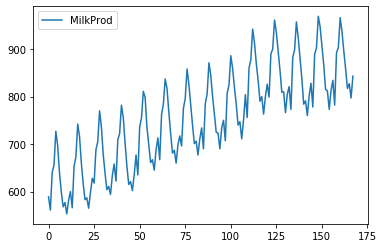

In [150]:
df = pd.read_csv('D:/data/csv/milkProd.csv')
ts = df['MilkProd']
df.plot();

In [151]:
val_prop = 0.7
df_train = df[:int(df.shape[0] * val_prop)]
df_test = df[int(df.shape[0] * val_prop):]
df.shape, df_train.shape, df_test.shape

((168, 2), (117, 2), (51, 2))

In [152]:
model1 = ExponentialSmoothing(df_train['MilkProd'], trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(df_train['MilkProd'], trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit1 = model1.fit()
fit2 = model2.fit()

C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [153]:
pred1 = fit1.forecast(51)
pred2 = fit2.forecast(51)

In [154]:
sse1 = np.sqrt(np.mean(np.square(df_test['MilkProd'] - pred1.values)))
sse2 = np.sqrt(np.mean(np.square(df_test['MilkProd'] - pred2.values)))

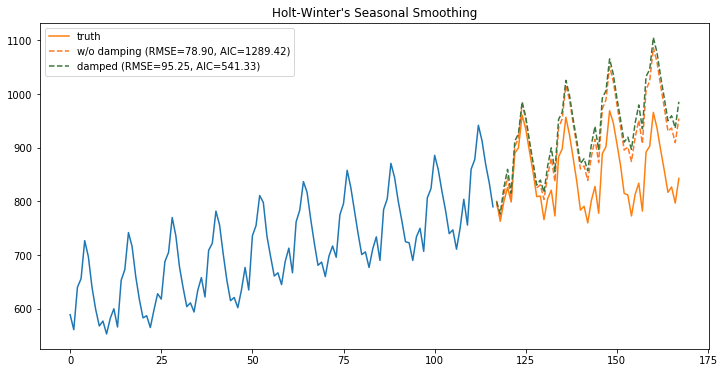

In [155]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_train['MilkProd']);
ax.plot(df_test['MilkProd'], label='truth');
ax.plot(df_test.index, pred1, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
ax.plot(df_test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");

In [168]:
model = sma.tsa.statespace.SARIMAX(df_train['MilkProd'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 12), enforce_invertibility=False, enforce_stationarity=False)
fit = sarima_model.fit()

In [204]:
pred = fit.get_prediction(125, 175)
pred_means = pred.predicted_mean 
#predicted_intervals = p.conf_int(alpha=0.05)
#lower_bounds = predicted_intervals['lower'] + df.data.iloc[-36:-1].rolling(12).mean().dropna().values
#upper_bounds = predicted_intervals['upper'] + df.data.iloc[-36:-1].rolling(12).mean().dropna().values

#sarima_rmse = np.sqrt(np.mean(np.square(df_test.values - p.predicted_mean.values)))

In [205]:
pred_means.values

array([ 949.8449986 ,  906.50561693,  870.41519181,  827.57029007,
        832.78289614,  798.97842902,  839.21339378,  877.7545576 ,
        832.83100352,  933.4440443 ,  951.61459349, 1014.95845517,
        986.93797351,  943.6043315 ,  907.50481993,  864.66953782,
        869.87790556,  836.07465101,  876.30961576,  914.85077959,
        869.9272255 ,  970.54026628,  988.71081547, 1052.05467715,
       1024.03419549,  980.70055349,  944.60104191,  901.7657598 ,
        906.97412755,  873.17087299,  913.40583775,  951.94700157,
        907.02344748, 1007.63648826, 1025.80703745, 1089.15089913,
       1061.13041747, 1017.79677547,  981.69726389,  938.86198178,
        944.07034953,  910.26709497,  950.50205973,  989.04322355,
        944.11966946, 1044.73271024, 1062.90325943, 1126.24712111,
       1098.22663945, 1054.89299745, 1018.79348587])

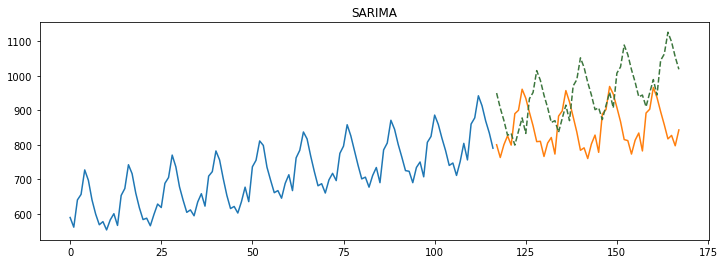

In [210]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_train['MilkProd']);
ax.plot(df_test['MilkProd']);
ax.plot(df_test.index, pred_means.values, color='#3c763d', linestyle='--', label='pred');
#ax.fill_between(df_test.index, lower_bounds, upper_bounds, color='#ff7823', alpha=0.3, label="confidence interval (95%)");
#ax.legend();
ax.set_title("SARIMA");

ValueError: x and y must have same first dimension, but have shapes (51,) and (1,)

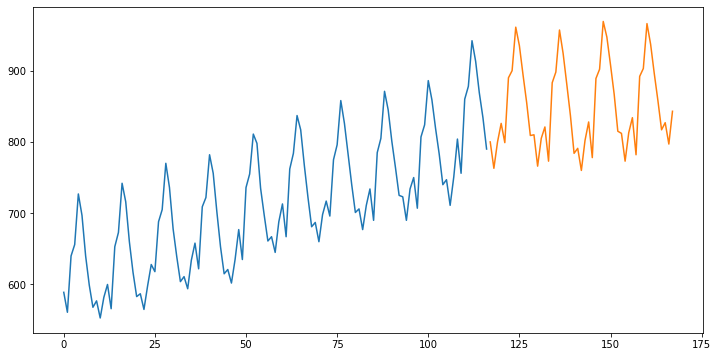

In [187]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_train['MilkProd']);
ax.plot(df_test['MilkProd'], label='truth');
ax.plot(df_test.index, pred, linestyle='--', color='#ff7823', label='pred');
ax.legend();
ax.set_title("SARIMA");

In [189]:
pred

### Credits & Links

https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051
https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e